In [ ]:
'''Pour Marie :
Il faut pour les exemples avoir les densités de chaque proba et aussi une fonction pour faire un tirage suivant ces probas.
Aussi, il y a un paramètre C qui est un paramètre qui restreint la condition d'égalité de p et q. 
Plus C est élevé plus on veut que P(X=Y) soit grand, mais l'inconvénient c'est que la variance du temps d'éxécution augmente aussi.
Du coup, pour les tests tu peux essayer de faire varier ce C pour comparer aussi le temps d'éxécution et sa variance.

'''

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

def thorisson_coupling(p_densite, p_echantillon, q_densite, q_echantillon, C=1.0):
    X = p_echantillon()
    U = np.random.uniform()
    
    if U < min(q_densite(X) / p_densite(X), C):
        Y = X
    else:
        A = 0
        while A != 1:
            Z = q_echantillon()
            U = np.random.uniform()
            if U > min(1, C * p_densite(Z) / q_densite(Z)):
                A = 1
            Y = Z
    return X, Y

def calcul_integral_min (p_densite, q_densite, C=1.0, limit_integrale=5, num_points=100000):
    x_vals = np.linspace(-limit_integrale, limit_integrale, num_points)
    min_vals = np.minimum(C*p_densite(x_vals), q_densite(x_vals))
    dx = x_vals[1] - x_vals[0]
    integral = np.sum(min_vals) * dx
    return integral

def erreur_egalite(X_val,Y_val,e=0.01):
    return sum(np.abs(X_val - Y_val)<=e)
    

Probabilité d'égalité P(X = Y) = 0.677
Valeur théorique (∫ min(C*p,q)) ≈ 0.676
Moyenne du temps d'exécution : 1.880039930343628e-05
Variance du temps d'exécution : 8.792473753335287e-10


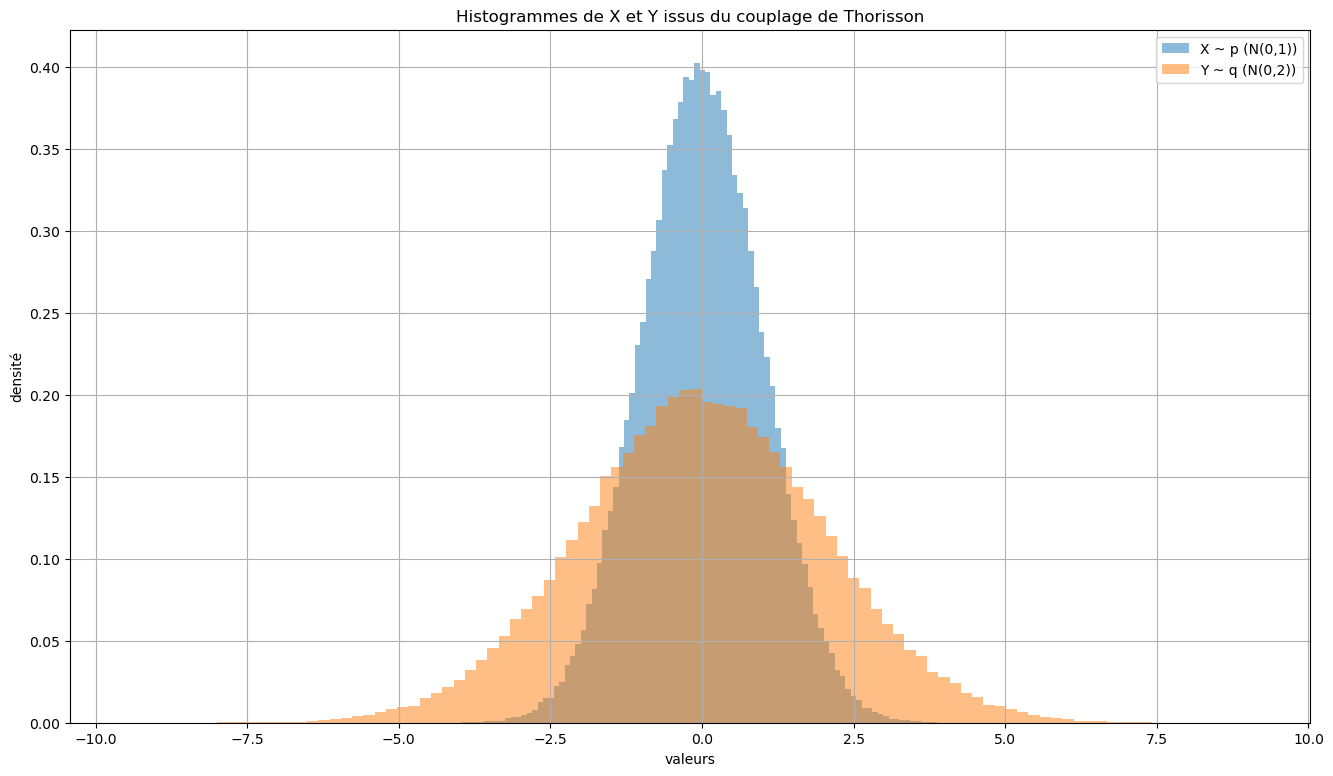

Ainsi, on peut affirmer que les variables X et Y suivent respectivement les lois p et q.
De plus leur probabilité d'égalité est très proche de l'intégrale du minimum des densités.
L'algorithme de Thorisson modifié fonctionne.


In [2]:
# Définition des densités et des échantillonneurs
def p_densite(x):     #Densité d'une loi N(0,1)
    return np.exp(-x**2 /2) /np.sqrt(2*np.pi)
    
def p_echantillon(): #Echantillonage d'une N(0,1)
    return np.random.normal(0,1)

def q_densite(x):     #Densité d'une loi N(0,2)
    return np.exp(-x**2 /8) / (2*np.sqrt(2*np.pi))
    
def q_echantillon(): #Echantillonage d'une N(0,2)
    return np.random.normal(0,2)

# Paramètre C
C = 0.99

# Génération de couples de variables X, Y
X_vals = []
Y_vals = []
times   = []
for _ in range(100000):
    debut=time.time()
    x, y = thorisson_coupling(p_densite, p_echantillon, q_densite, q_echantillon, C)
    fin=time.time()
    X_vals.append(x)
    Y_vals.append(y)
    times.append(fin-debut)
X_vals = np.array(X_vals)
Y_vals = np.array(Y_vals)
times   = np.array(times)

# Analyse : probabilité d'égalité
print(f"Probabilité d'égalité P(X = Y) = {erreur_egalite(X_vals,Y_vals) / len(X_vals):.3f}")

# Analyse : valeur théorique de l'intrégrale du min
print(f"Valeur théorique (∫ min(C*p,q)) ≈ {calcul_integral_min(p_densite, q_densite, C=C):.3f}")

# Analys : Moyenne et variance du temps d'exécution
print(f"Moyenne du temps d'exécution : {np.mean(times)}")
print(f"Variance du temps d'exécution : {np.var(times)}")

# Visualisation
plt.figure(figsize=(16, 9))
plt.hist(X_vals, bins=100, density=True, alpha=0.5, label='X ~ p (N(0,1))') #Le paramètre alpha joue sur la transparence de l'histogramme pour visualiser les zones de recouvrement
plt.hist(Y_vals, bins=100, density=True, alpha=0.5, label='Y ~ q (N(0,2))') #Le paramètre density permet de vérifier les lois marginales de X et de Y
plt.legend()
plt.title("Histogrammes de X et Y issus du couplage de Thorisson")
plt.xlabel("valeurs")
plt.ylabel("densité")
plt.grid(True)
plt.show()

print("Ainsi, on peut affirmer que les variables X et Y suivent respectivement les lois p et q.")
print("De plus leur probabilité d\'égalité est très proche de l'intégrale du minimum des densités.")
print("L\'algorithme de Thorisson modifié fonctionne.")